# MACHINE LEARNING TRAINING

## Table of contents

1. [Project information](#1.-Project-Information)

2. [Finding all variables and understanding them](#2.-Finding-all-variables-and-understanding-them)

3. [Modelling](#3.-Modelling)

4. [Machine Learning models](#4.-Machine-Learning-models)

5. [Hyperparameter tuning](#5.-Hyperparameter-tuning)

6. [Results](#6.-Results)
   
8. [Results visualization](#7.-Results-visualization)

## <font color='blue'>1. Project information</font> 

This project is a second part adding now "machine learning" models in the anylisis.

In the past analysis, I took my first Exploratory Data Analysis (EDA) and visualization project using Python and Tableau, where I explored data science jobs titles and salaries between 2020 and 2023. 

The "global salary index" dataset comes from the ai-jobs.net website for roles in the AI, ML, Data Science space based on internal data obtained from surveys and jobs with open salaries.

This dataset is processed and updated on a weekly basis, but I took the dataset updated on September 29th, 2023.

## <font color='blue'>2. Finding all variables and understanding them</font>

### Importing Required Libraries

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import pycountry
from pycountry import countries
sns.set_theme()
import pickle

%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV


### Read dataset

In [3]:
salaries = pd.read_csv('../../data/cleaned/data_jobs.csv')
salaries.head(5)

,work_year,salary,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size,job_area
0,2023,96313,mid,full_time,Data Scientist,Canada,remote,Canada,small,Data
1,2023,250000,senior,full_time,Machine Learning Engineer,United States,on_site,United States,medium,Machine Learning
2,2023,140000,senior,full_time,Machine Learning Engineer,United States,on_site,United States,medium,Machine Learning
3,2023,48585,mid,full_time,Data Analyst,Portugal,remote,Portugal,medium,Data
4,2023,43187,mid,full_time,Data Analyst,Portugal,remote,Portugal,medium,Data


In [4]:
salaries.shape

(7595, 10)

In [5]:
salaries.dtypes

work_year              int64
salary                 int64
experience_level      object
employment_type       object
job_title             object
employee_residence    object
remote_ratio          object
company_location      object
company_size          object
job_area              object
dtype: object

In [6]:
salaries.columns

Index(['work_year', 'salary', 'experience_level', 'employment_type',
       'job_title', 'employee_residence', 'remote_ratio', 'company_location',
       'company_size', 'job_area'],
      dtype='object')

**Data Dictionary**

- **work_year**: The year the salary was paid;
- **salary**: The salary in USD;
- **experience_level**: The experience level in the job during the year;
- **employment_type**: The type of employement for the role;
- **job_title**: The role worked in during the year;
- **employee_residence**: Employee's primary country of residence in during the work year;
- **remote_ratio**: The overall amount of work done remotely;
- **company_location**: The country of the employer's main office or contracting branch;
- **company_size**: The average number of people that worked for the company during the year.
- **job_area**: job_titles grouped by area

### Data Cleaning

The dataset < salaries > is already clean, it was cleaned in the first stage of the EDA + visualization project.

#### Adding some analysis features

In [7]:
salaries.dtypes

work_year              int64
salary                 int64
experience_level      object
employment_type       object
job_title             object
employee_residence    object
remote_ratio          object
company_location      object
company_size          object
job_area              object
dtype: object

In [8]:
# Convert columns string to float
salaries['work_year'] = salaries['work_year'].astype(float)
salaries['salary'] = salaries['salary'].astype(float)

In [9]:
#Dtypes after conversion
salaries.dtypes

work_year             float64
salary                float64
experience_level       object
employment_type        object
job_title              object
employee_residence     object
remote_ratio           object
company_location       object
company_size           object
job_area               object
dtype: object

___

## <font color='blue'>3. Modelling</font>

Now that the EDA (Exploratory Data Analysis) is complete, we can dive straight into the modeling phase.

### Model training

**Predicting salaries using machine learning models is a common task in data science, we can do it using Pandas and Scikit-Learn.**

Split the data into a training set and a test set to evaluate the model's performance.

In [10]:
# Identify categorical columns based on data type
categorical_col = salaries.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns in the data:", categorical_col)

Categorical columns in the data: ['experience_level', 'employment_type', 'job_title', 'employee_residence', 'remote_ratio', 'company_location', 'company_size', 'job_area']


In [11]:
# Identify numerical columns based on data type
numerical_col = salaries.select_dtypes(include=np.number).columns.tolist()
print("numerical columns in data:", numerical_col)

numerical columns in data: ['work_year', 'salary']


#### Correlation matrix

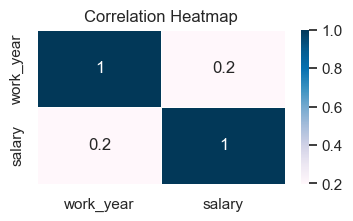

In [12]:
# Select only the numerical columns from the DataFrame
numerical_data = salaries[numerical_col]

# Compute the correlation matrix
correlation_matrix_num = numerical_data.corr()

# Create a heatmap with colors
plt.figure(figsize=(4, 2))
sns.heatmap(correlation_matrix_num, annot=True, cmap='PuBu', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

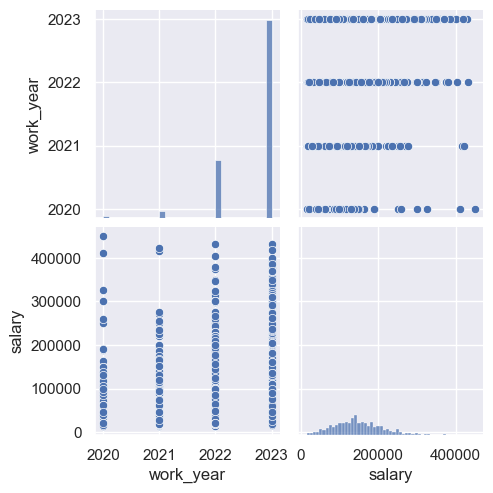

In [13]:
sns.pairplot(salaries[numerical_col])

There are no linear relationship between features and salary

## <font color='blue'>4. Machine Learning models</font>

#### Encode Categorical Features

In [16]:
# Encode categorical features using one-hot encoding
from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoding to the categorical features
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_features = encoder.fit_transform(salaries[categorical_col])

# Define the file path to save the model
encoder_save_model = '../../models/encoders/encoder.pkl'

# Save the fitted model to the file using pickle
with open(encoder_save_model, 'wb') as model_file:
    pickle.dump(encoder_save_model, model_file)

/Users/marina/Documents/Marina/Bootcamp/Week_9/Final_project/final_env/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [17]:
# Create a DataFrame with the one-hot encoded features and appropriate column names
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_col))

# Combine the one-hot encoded features with the numerical features
X = pd.concat([encoded_df, salaries[['work_year']]], axis=1)

#### Split the data into features (X) and target variable (y=salary)

In [18]:
y = salaries['salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6076, 287)
(1519, 287)
(6076,)
(1519,)


## RandomForest/GradientBoosting/AdaBoost/KNNessor


Machine learning models choosen:

- **Random Forest Regressor:**

Random Forest is a versatile ensemble model that works well for regression tasks, including salary prediction. It has the ability to handle both numerical and categorical features, which can be common in salary datasets. Random Forests are known for their robustness, resistance to overfitting, and the ability to capture complex relationships in the data. They are also capable of feature importance analysis, which can help identify the factors that most strongly influence salaries.

- **Gradient Boosting Regressor:**

Gradient Boosting is another ensemble method that is well-suited for regression problems. It builds an ensemble of weak learners, combining them to create a strong predictive model. It can handle non-linear relationships in the data and adapt to the specific patterns in the salary dataset. Gradient Boosting is often used when high predictive accuracy is a priority, and it can provide excellent results after proper hyperparameter tuning.

- **Ada Boost Regressor:**

Ada Boost is an ensemble technique that is useful when the data is noisy and the relationships between features and salaries are not straightforward. It focuses on improving the performance of weak learners, and when applied to regression tasks, it can be effective in situations where data is heterogeneous or when there are outliers in the salary dataset. Ada Boost can adapt well to different data distributions and enhance model performance.

- **K-Nearest Neighbors (KNN):**

KNN is a simple and interpretable model that can be used for salary prediction, especially when the data has a clear spatial or geographic component. It assigns salaries based on the similarity of instances in the dataset, which can be useful in cases where local or neighborhood patterns play a significant role in determining salaries. KNN can be a good choice when the salary prediction task depends on the characteristics of similar individuals.


#### Fit models

In [20]:
# Fit models

rf=RandomForestRegressor().fit(X_train,y_train)
gbm=GradientBoostingRegressor().fit(X_train,y_train)
ada=AdaBoostRegressor().fit(X_train,y_train)
knn=KNeighborsRegressor().fit(X_train,y_train)

#### Save fit models

In [21]:
# Define the file path to save the model
rf_save_model = '../../models/models/rf.pkl'

# Save the fitted model to the file using pickle
with open(rf_save_model, 'wb') as model_file:
    pickle.dump(rf_save_model, model_file)

In [22]:
# Define the file path to save the model
gbm_save_model = '../../models/models/gbm.pkl'

# Save the fitted model to the file using pickle
with open(gbm_save_model, 'wb') as model_file:
    pickle.dump(gbm_save_model, model_file)

In [23]:
# Define the file path to save the model
ada_save_model = '../../models/models/ada.pkl'

# Save the fitted model to the file using pickle
with open(ada_save_model, 'wb') as model_file:
    pickle.dump(ada_save_model, model_file)

In [24]:
# Define the file path to save the model
knn_save_model = '../../models/models/knn.pkl'

# Save the fitted model to the file using pickle
with open(knn_save_model, 'wb') as model_file:
    pickle.dump(knn_save_model, model_file)

#### Evaluate models

In [25]:
models=[rf,gbm,ada,knn]

In [26]:
# Define a function to predict models

def evaluate_machine_learning(y,models): 
    y_pred=models.predict(X_test)
    mse=mean_squared_error(y_test,y_pred)
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    r2=r2_score(y_test,y_pred)*100
    
    return mse,rmse,r2

In [27]:
#Apply the function to each machine learning model

data = {
    'Model': ["RandomForestRegressor", "GradientBoostingRegressor", "AdaBoostRegressor", "KNeighborsRegressor"],
    'MSE': [],
    'RMSE': [],
    'R-squared': []
}

print("Different models success rates:")
print("-------------------------------")
for model, name in list(zip(models, data['Model'])):
    mse, rmse, r2 = evaluate_machine_learning("salary",model)
    data['MSE'].append(mse)
    data['RMSE'].append(rmse)
    data['R-squared'].append(r2)
    print("Model: ",name)
    print("MSE {:.2f}".format(mse))
    print("RMSE {:.2f}".format(rmse))
    print("R2 {:.2f}".format(r2))
    print("-------------------------------")

Different models success rates:
-------------------------------
Model:  RandomForestRegressor
MSE 2657831392.55
RMSE 51554.16
R2 36.47
-------------------------------
Model:  GradientBoostingRegressor
MSE 2695137299.42
RMSE 51914.71
R2 35.58
-------------------------------
Model:  AdaBoostRegressor
MSE 4009420921.97
RMSE 63319.99
R2 4.16
-------------------------------
Model:  KNeighborsRegressor
MSE 3009562876.28
RMSE 54859.48
R2 28.06
-------------------------------


In [28]:
# Create table with scores

# Create a DataFrame from the dictionary
scores_df = pd.DataFrame(data)

scores_df = scores_df.round(2)

# Print the DataFrame
display(scores_df)

,Model,MSE,RMSE,R-squared
0,RandomForestRegressor,2.657831e+09,51554.16,36.47
1,GradientBoostingRegressor,2.695137e+09,51914.71,35.58
2,AdaBoostRegressor,4.009421e+09,63319.99,4.16
3,KNeighborsRegressor,3.009563e+09,54859.48,28.06


#### Analysis

#### Based on the provided evaluation metrics, the models can be ranked from best to worst performance as follows:

The "RandomForestRegressor" model performs the best among the other models.

- RandomForestRegressor: This model has the lowest MSE and RMSE, along with the highest R-squared (R^2) value, making it the top-performing model.

- GradientBoostingRegressor: While it performs well, it has slightly higher MSE and RMSE compared to the RandomForestRegressor, and a slightly lower R-squared value.

- KNeighborsRegressor: It performs decently but has higher errors (MSE and RMSE) compared to the top two models and a lower R-squared value.

- AdaBoostRegressor: This model has the highest MSE and RMSE, along with the lowest R-squared value, indicating the poorest performance among the models.

**The RandomForestRegressor and GradientBoostingRegressor models seem to perform the best for the salary prediction task**. 

RandomForestRegressor, in particular, has the lowest MSE and RMSE, the highest R-squared value, which indicates that it has the smallest prediction errors compared to the other models. Additionally, it has the highest R-squared value, suggesting that it explains the most variance in the salary data.

The "RandomForestRegressor" is known for its ability to handle complex relationships in data, making it a strong choice for regression tasks. It combines multiple decision trees to reduce overfitting and improve predictive accuracy. The ensemble of trees in the random forest provides robustness and generalization capabilities, resulting in better performance on the given dataset.

In summary, the "RandomForestRegressor" is the best-performing model for predicting salaries in this context, primarily due to its lower prediction errors and higher R-squared value compared to the other models.

However, **it's essential to consider hyperparameter tuning** when choosing the final model for our application.

____

## <font color='blue'>5. Hyperparameter tuning</font>

Hyperparameter tuning can significantly improve the performance of machine learning models so we will apply ot on the models with the best performance.

## RandomForestRegressor:

Random Forests have several hyperparameters that can be tuned, such as the number of estimators (trees) and the maximum depth of the trees.

We will use the Grid Search technique to find the best combination of hyperparameters. 

GridSearchCV: We will use it for systematically exploring hyperparameter configurations, improving model performance, and making the model selection and tuning process more efficient and effective.

In [29]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 7, 10],
}

rf_model = RandomForestRegressor()
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

#Save the model
rf_grid_search_path = '../../models/models/rf_gridsearch.pkl'
# Save the fitted model to the file using pickle
with open(rf_grid_search_path, 'wb') as model_file:
    pickle.dump(rf_grid_search_path, model_file)

best_rf_model = grid_search.best_estimator_

## GradientBoostingRegressor:

In [30]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}

gb_model = GradientBoostingRegressor()
grid_search = GridSearchCV(gb_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

#Save the model
gb_grid_search_path = '../../models/models/gb_gridsearch.pkl'
# Save the fitted model to the file using pickle
with open(gb_grid_search_path, 'wb') as model_file:
    pickle.dump(gb_grid_search_path, model_file)


best_gb_model = grid_search.best_estimator_

#### After tuning, we need to re-evaluate the model's performance to see if the MSE and R-squared values have improved.

In [31]:
# Fit the models with the best hyperparameters on the training data
best_rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=200)

In [32]:
#Save the model
best_rf_model_path = '../../models/models/best_rf.pkl'

# Save the fitted model to the file using pickle
with open(best_rf_model_path, 'wb') as model_file:
    pickle.dump(best_rf_model_path, model_file)

In [33]:
best_gb_model.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.2, max_depth=5)

In [34]:
#Save the model
best_gb_model_path = '../../models/models/best_gb.pkl'

# Save the fitted model to the file using pickle
with open(best_gb_model_path, 'wb') as model_file:
    pickle.dump(best_gb_model_path, model_file)

In [35]:
models_hyper=[best_rf_model, best_gb_model]

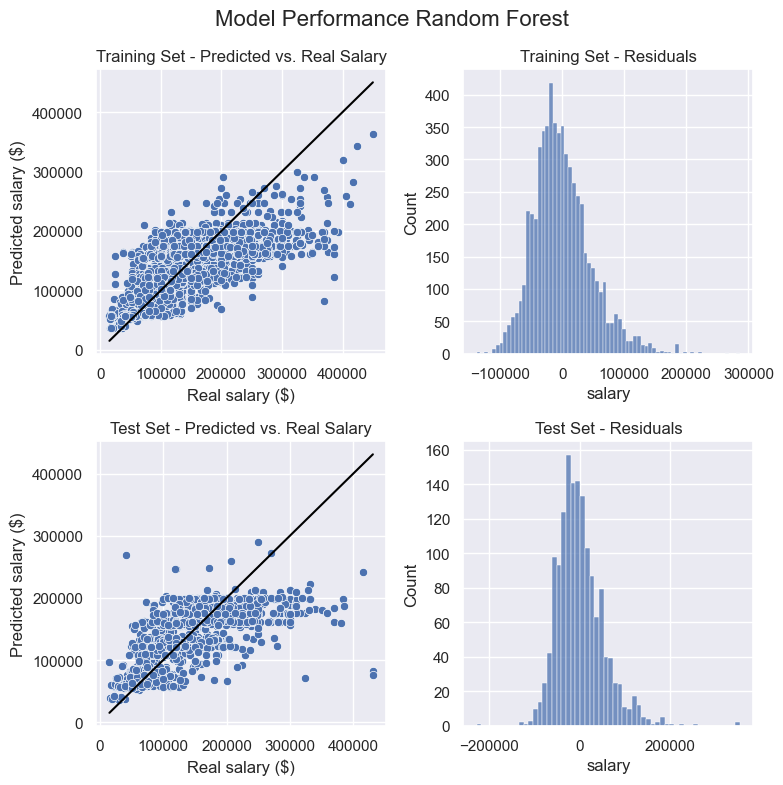

In [60]:
# Random Forest

y_pred_train_rf = best_rf_model.predict(X_train)
y_pred_test_rf = best_rf_model.predict(X_test)

fig, ax = plt.subplots(2, 2, figsize=(8, 8))

fig.suptitle("Model Performance Random Forest", fontsize=16)

# Training Set
sns.scatterplot(y=y_pred_train_rf, x=y_train, ax=ax[0, 0])
sns.lineplot(y=y_train, x=y_train, color="black", ax=ax[0, 0])
sns.histplot(y_train - y_pred_train_rf, ax=ax[0, 1])
ax[0, 0].set_title("Training Set - Predicted vs. Real Salary")
ax[0, 0].set_ylabel("Predicted salary ($)")
ax[0, 0].set_xlabel("Real salary ($)")
ax[0, 1].set_title("Training Set - Residuals")

# Test Set
sns.scatterplot(y=y_pred_test_rf, x=y_test, ax=ax[1, 0])
sns.lineplot(y=y_test, x=y_test, color="black", ax=ax[1, 0])
sns.histplot(y_test - y_pred_test_rf, ax=ax[1, 1])
ax[1, 0].set_title("Test Set - Predicted vs. Real Salary")
ax[1, 0].set_ylabel("Predicted salary ($)")
ax[1, 0].set_xlabel("Real salary ($)")
ax[1, 1].set_title("Test Set - Residuals")

plt.tight_layout()
plt.show()


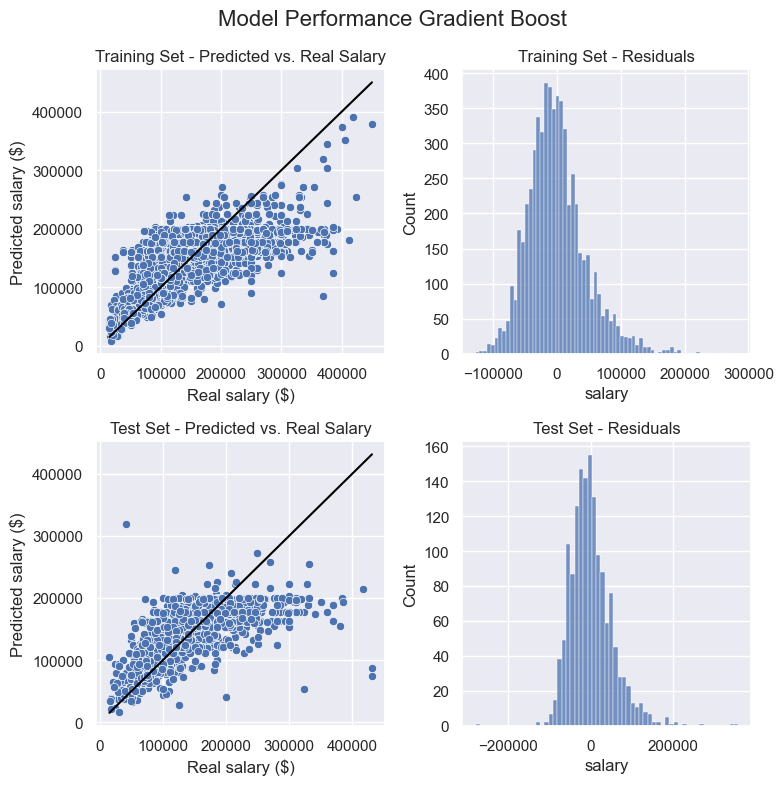

In [61]:
y_pred_train_gb = best_gb_model.predict(X_train)
y_pred_test_gb = best_gb_model.predict(X_test)

fig, ax = plt.subplots(2, 2, figsize=(8, 8))

fig.suptitle("Model Performance Gradient Boost", fontsize=16)

# Training Set
sns.scatterplot(y=y_pred_train_gb, x=y_train, ax=ax[0, 0])
sns.lineplot(y=y_train, x=y_train, color="black", ax=ax[0, 0])
sns.histplot(y_train - y_pred_train_gb, ax=ax[0, 1])
ax[0, 0].set_title("Training Set - Predicted vs. Real Salary")
ax[0, 0].set_ylabel("Predicted salary ($)")
ax[0, 0].set_xlabel("Real salary ($)")
ax[0, 1].set_title("Training Set - Residuals")

# Test Set
sns.scatterplot(y=y_pred_test_gb, x=y_test, ax=ax[1, 0])
sns.lineplot(y=y_test, x=y_test, color="black", ax=ax[1, 0])
sns.histplot(y_test - y_pred_test_gb, ax=ax[1, 1])
ax[1, 0].set_title("Test Set - Predicted vs. Real Salary")
ax[1, 0].set_ylabel("Predicted salary ($)")
ax[1, 0].set_xlabel("Real salary ($)")
ax[1, 1].set_title("Test Set - Residuals")

plt.tight_layout()
plt.show()

In [36]:
#Apply the function to each machine learning model

data_hyper = {
    'Model': ["RandomForestRegressor", "GradientBoostingRegressor"],
    'MSE': [],
    'RMSE': [],
    'R-squared': []
}

print("Different models success rates:")
print("-------------------------------")
for model, name in list(zip(models_hyper, data_hyper['Model'])):
    mse, rmse, r2 = evaluate_machine_learning("salary",model)
    data['MSE'].append(mse)
    data['RMSE'].append(rmse)
    data['R-squared'].append(r2)
    print("Model: ",name)
    print("MSE {:.2f}".format(mse))
    print("RMSE {:.2f}".format(rmse))
    print("R2 {:.2f}".format(r2))
    print("-------------------------------")

Different models success rates:
-------------------------------
Model:  RandomForestRegressor
MSE 2692658387.73
RMSE 51890.83
R2 35.64
-------------------------------
Model:  GradientBoostingRegressor
MSE 2646807116.83
RMSE 51447.13
R2 36.73
-------------------------------


___

#### Comparison before and after using hyperparameters

Before Hyperparameter Tuning:

Model:  RandomForestRegressor- 
MSE 2657831392.55- 
RMSE 51554.1- 6
R2 36%.----
Model:  GradientBoostingRegre- ssor
MSE 26951372- 99.42
RMSE 51- 914.71
%2 35.58


After Hyperparameter Model:  RandomForestRegressor
- MSE 2692658387.73
- RMSE 51890.83
- R2 35.64

Model:  GradientBoostingRegressor
- MSE 2646807116.83
- RMSE 51447.13
- R2 36.73 R2 36.87

In [37]:
# Create a table to compare results

# We need to create a dictionary with the model names and their corresponding scores
data = {
    'Model': ["RandomForestRegressor", "RandomForestRegressor", "GradientBoostingRegressor", "GradientBoostingRegressor"],
    'Tuning': ["Before", "After", "Before", "After"],
    'MSE': [2657831392.55, 2692658387.73, 2695137299.42, 2646807116.83],
    'RMSE': [51554.16, 51890.83, 51914.71, 51447.13],
    'R-squared': [36.47, 35.64, 35.58, 36.73]
}

# Create a DataFrame from the dictionary
comparison_df = pd.DataFrame(data)

# Print the DataFrame
display(comparison_df)

,Model,Tuning,MSE,RMSE,R-squared
0,RandomForestRegressor,Before,2.657831e+09,51554.16,36.47
1,RandomForestRegressor,After,2.692658e+09,51890.83,35.64
2,GradientBoostingRegressor,Before,2.695137e+09,51914.71,35.58
3,GradientBoostingRegressor,After,2.646807e+09,51447.13,36.73


## <font color='blue'>6. Results</font>

These results represent the model performance after hyperparameter tuning. Hyperparameter tuning involves finding the best set of hyperparameters to optimize the model's performance. It's important to note that while hyperparameter tuning has improved some aspects of the models, the changes are relatively small.

- The "RandomForestRegressor" model performed better before hyperparameter tuning, as it had a lower MSE and RMSE and a higher R-squared compared to the "GradientBoostingRegressor."

- However, after hyperparameter tuning, the "GradientBoostingRegressor" model showed better performance with a lower MSE and RMSE and a higher R-squared.

So, after hyperparameter tuning, **the "GradientBoostingRegressor" model seems to perform better** in terms of MSE, RMSE, and R-squared.

## <font color='blue'>7. Results visualization</font>

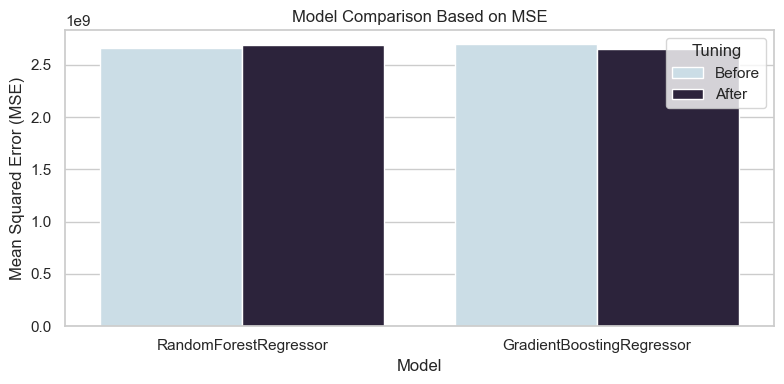

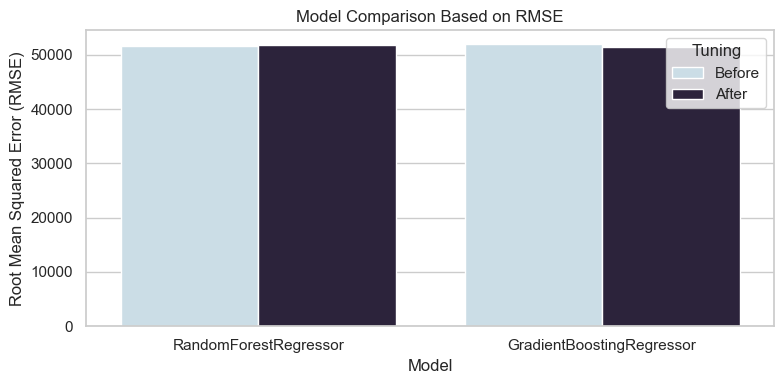

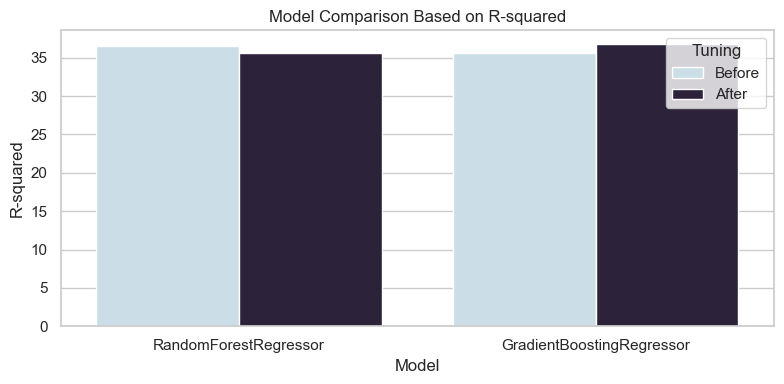

In [38]:
# Set the style for the plot (optional)
sns.set(style="whitegrid")

# Create a barplot to compare the models based on MSE, with hue for tuning
plt.figure(figsize=(8, 4))
sns.barplot(x="Model", y="MSE", hue="Tuning", data=comparison_df, palette="ch:s=.25,rot=-.25")
plt.title("Model Comparison Based on MSE")
plt.xlabel("Model")
plt.ylabel("Mean Squared Error (MSE)")
plt.tight_layout()

# Show the plot
plt.show()

# Create a barplot to compare the models based on RMSE, with hue for tuning
plt.figure(figsize=(8, 4))
sns.barplot(x="Model", y="RMSE", hue="Tuning", data=comparison_df, palette="ch:s=.25,rot=-.25")
plt.title("Model Comparison Based on RMSE")
plt.xlabel("Model")
plt.ylabel("Root Mean Squared Error (RMSE)")
plt.tight_layout()

# Show the plot
plt.show()

# Create a barplot to compare the models based on R-squared, with hue for tuning
plt.figure(figsize=(8, 4))
sns.barplot(x="Model", y="R-squared", hue="Tuning", data=comparison_df, palette="ch:s=.25,rot=-.25")
plt.title("Model Comparison Based on R-squared")
plt.xlabel("Model")
plt.ylabel("R-squared")
plt.tight_layout()

# Show the plot
plt.show()

#### Sort feature_importances from the best model performance

In [39]:
# Sort feature_importances from the best model perfomance

feature_importances = list(zip(best_gb_model.feature_importances_.tolist(), list(X_train.columns)))
feature_importances = sorted(feature_importances, reverse=True)
feature_importances = [ (round(elem[0],3), elem[1]) for elem in feature_importances if elem[0] > 0.001]
feature_importances_df = pd.DataFrame(feature_importances, columns=["Importance", "column"])

In [40]:
feature_importances_df

,Importance,column
0,0.290,employee_residence_United States
1,0.153,job_title_Data Analyst
2,0.059,experience_level_senior
3,0.052,experience_level_executive
4,0.052,experience_level_mid
...,...,...
56,0.001,job_title_AI Scientist
57,0.001,job_title_Data Architect
58,0.001,job_title_Business Intelligence Engineer
59,0.001,job_area_Cloud


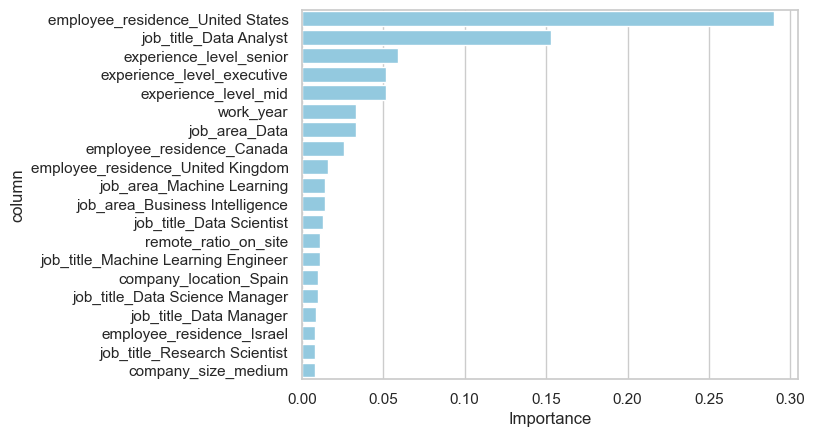

In [41]:
sns.barplot(data=feature_importances_df.iloc[:20,:], y="column", x="Importance", color="skyblue");